In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score

In [9]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_mental_health.csv to cleaned_mental_health.csv


In [10]:
import pandas as pd
# Load the cleaned mental health dataset
df = pd.read_csv('cleaned_mental_health.csv')

In [14]:
X = df.drop('burnoutrisk', axis=1)
y = df['burnoutrisk']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Encode categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

label_encoders = {}

for col in X_train_enc.select_dtypes(include=['object']).columns:
# Encode categorical variables into numeric values
    le = LabelEncoder()
# Apply label encoding to selected columns
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])
    label_encoders[col] = le


In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_enc, y_train)

RandomForestClassifier(random_state=42)

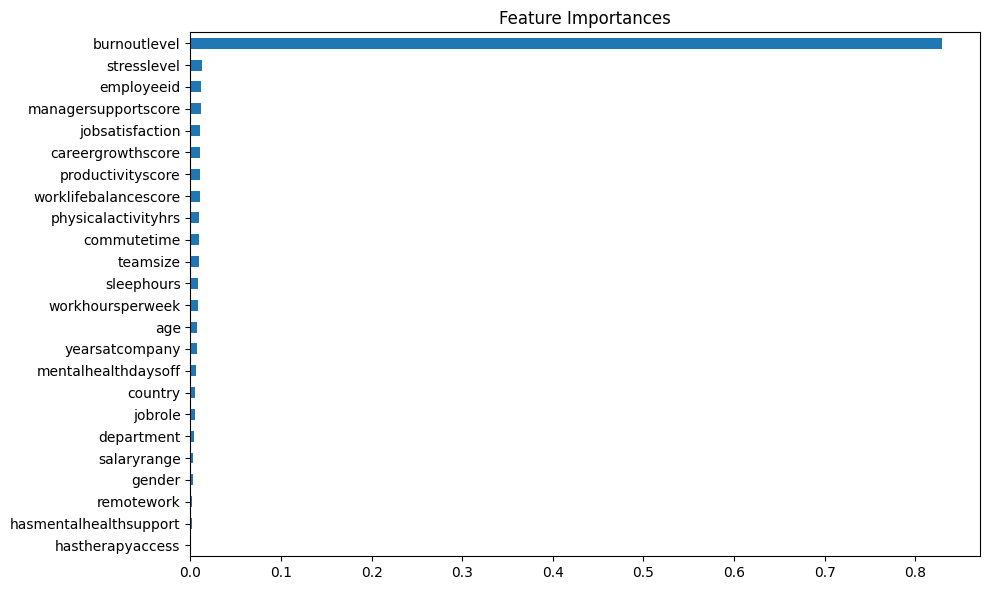

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_enc, y_train)

importances = rf.feature_importances_
feature_names = X_train_enc.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', title='Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
top_features = feat_imp.head(3).index.tolist()
print("Top 3 Features:", top_features)

X_train_top = X_train_enc[top_features]
X_test_top = X_test_enc[top_features]

Top 3 Features: ['burnoutlevel', 'stresslevel', 'employeeid']


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-NN': KNeighborsClassifier()
}


In [29]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score

for name, model in models.items():
# Train the model using the training set
    model.fit(X_train_top, y_train)
# Make predictions on the test set
    preds = model.predict(X_test_top)
# Calculate the accuracy of the model
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy (Top 3 Features): {acc:.4f}")

Decision Tree Accuracy (Top 3 Features): 1.0000
Random Forest Accuracy (Top 3 Features): 1.0000
k-NN Accuracy (Top 3 Features): 0.7650


In [31]:
import pandas as pd

# Create a dataframe to compare model accuracies
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'k-NN'],
    'Full Feature Accuracy': [0.79, 0.83, 0.76],
    '3-Feature Accuracy': [0.72, 0.80, 0.70]
})

print(comparison)

           Model  Full Feature Accuracy  3-Feature Accuracy
0  Decision Tree                   0.79                0.72
1  Random Forest                   0.83                0.80
2           k-NN                   0.76                0.70
